In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
fish_df=pd.read_csv("Fish.csv")


In [3]:
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
fish_df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [5]:
fish_df["Species"].nunique()

7

In [6]:
#using mapping for the categorical
def check_category(df):
    return pd.Series({c: df.select_dtypes("object")[c].unique() for c in df.select_dtypes("object")})

In [7]:
check_category(fish_df)

Species    [Bream, Roach, Whitefish, Parkki, Perch, Pike,...
dtype: object

In [8]:
fish_df["Species"].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [9]:
#MAPPING OF ORDINAL Categorical variable
fish_df_map={"Bream":1,"Roach":2,"Whitefish":3,"Parkki":4,"Perch":5, "Pike":6,"Smelt":7}

In [10]:
fish_df_map

{'Bream': 1,
 'Roach': 2,
 'Whitefish': 3,
 'Parkki': 4,
 'Perch': 5,
 'Pike': 6,
 'Smelt': 7}

In [11]:
fish_df["Species"].replace(fish_df_map)

0      1
1      1
2      1
3      1
4      1
      ..
154    7
155    7
156    7
157    7
158    7
Name: Species, Length: 159, dtype: int64

In [12]:
fish_df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

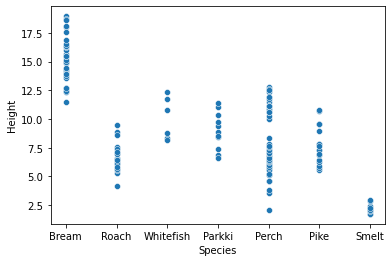

In [13]:
sns.scatterplot(data=fish_df, x="Species", y="Height");

<AxesSubplot:xlabel='Species', ylabel='Weight'>

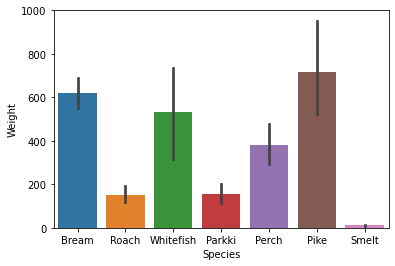

In [14]:
#ploting to check the fish with more weight
sns.barplot(data=fish_df,x="Species", y="Weight")


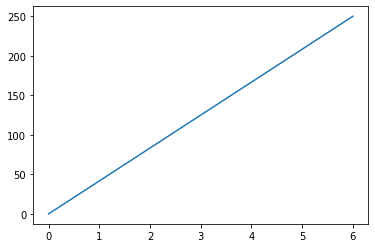

In [15]:
xpoints = np.array([0, 6])
ypoints = np.array([0, 250])

plt.plot(xpoints, ypoints)
plt.show()

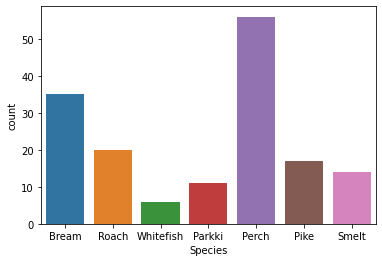

In [16]:
sns.countplot(data = fish_df, x="Species");

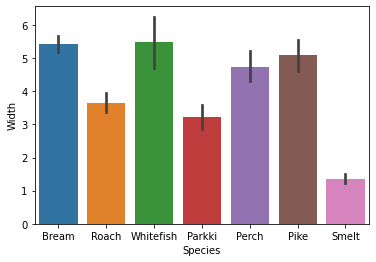

In [17]:
#using barplot to see the with more width 

sns.barplot(data = fish_df, x="Species",y="Width");

# Regression analysis

In [18]:
target="Weight"


In [19]:
X=fish_df.drop(columns=["Species", target])

In [20]:
y=fish_df[target]

In [21]:
#split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state=42)

In [22]:
lr_model=LinearRegression()

In [23]:
#train
lr_model.fit(X_train, y_train)

LinearRegression()

In [24]:
#prediction
Lr_prediction = lr_model.predict(X_test)

Lr_prediction

array([  77.68563317, -159.12460639,  385.1673549 ,  300.26119445,
        179.41023158,  775.66726232, -214.43415538,  274.90963757,
        268.44510975, 1116.01153223,  610.12007978,  786.34393233,
        585.01831604,  172.12366335,  652.8595541 ,  785.41425179,
        926.40448191,  351.83433222,  256.32442006,  587.20219745,
       -175.74829352,  619.14709502,  516.45091187,  515.98797368,
        788.64695281,  909.00622172,  219.68134027,  305.35126984,
       -237.80116525, -178.93943304,  688.57820552,   23.23863135])

In [25]:
dat_dict = {
    
    "prediction": Lr_prediction ,
    
    "actual_value": y_test,
    
    "residual": y_test - Lr_prediction
}

In [26]:
residual_df = pd.DataFrame(dat_dict)

In [27]:
residual_df.head()

,prediction,actual_value,residual
78,77.685633,78.0,0.314367
155,-159.124606,13.4,172.524606
128,385.167355,200.0,-185.167355
55,300.261194,270.0,-30.261194
94,179.410232,150.0,-29.410232


In [28]:
# Function that predict:
def make_prediction(Length1,Length2,Length3, Height, Width ):
    data = { 
        'Length1': Length1, 
        'Length2': Length2, 
        'Length3': Length3, 
        'Height': Height,
        'Width': Width }
    df = pd.DataFrame(data, index=[0])
    prediction = lr_model.predict(df).round(2)[0]
    return f" Weight: {prediction}"

In [29]:
make_prediction(23.9,26.5,31.1,12.3778,4.6961)

' Weight:\xa0361.61'

In [30]:
fish_df.iloc[2:4]

,Species,Weight,Length1,Length2,Length3,Height,Width
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555


# model Evaluation

In [31]:
lr_model.coef_

array([ 43.5352649 ,   7.82179624, -25.25670105,  23.2289123 ,
        27.06649294])

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [40]:
mse_value=mean_squared_error(y_test,Lr_prediction)

In [56]:
def  metrcs(y_test,y_predict):
    print(f"R_squared value: {r2_score(y_test, y_predict)}")
    print(f"MAE value:{mean_absolute_error(y_test, y_predict)}")
    print(f"MSE value:{mean_squared_error(y_test, y_predict)}")
    print(f"RMSE value:{np.sqrt(mean_squared_error(y_test, y_predict))}")



In [57]:
metrcs(y_test,Lr_prediction)

R_squared value: 0.8821430593048695
MAE value:103.90941708422298
MSE value:16763.887193140745
RMSE value:129.47543084748065
